<a href="https://colab.research.google.com/github/cwkwanstat/HKU_STAT3600/blob/main/ozone_std.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.stats import t
from scipy.stats import f
import math

Ch04
P.4

In [ ]:
mydata = np.loadtxt("https://raw.githubusercontent.com/cwkwanstat/HKU_STAT3600/main/ozone.txt")
n,p=mydata.shape

x = mydata[:,1:4]
y = mydata[:,0]
x0 = np.ones((n,1))
x = np.hstack((x0,x))

n,p=x.shape

P.5

In [ ]:
ixtx=np.linalg.inv(x.T @ x)
beta=ixtx @ x.T @ y
beta

array([-0.29527103,  0.00130582,  0.04560574, -0.0278435 ])

P.9

In [ ]:
yhat=x @ beta
yhat

array([2.80237697, 2.91968085, 2.92329255, 2.62080527, 2.82008722,
       2.1405034 , 1.9518356 , 2.91573227, 2.83723452, 2.86021901,
       2.06720602, 2.73943889, 2.7814716 , 1.8937897 , 2.90619208,
       2.3196591 , 2.13583249, 2.98960734, 2.24924285, 2.27269247,
       2.44316748, 3.31299175, 3.44007177, 3.32904628, 3.3401567 ,
       3.80499812, 3.77400703, 3.41491277, 3.05091401, 2.78283389])

In [ ]:
res=y-yhat
res

array([ 6.47623027e-01,  3.80319146e-01, -6.33292553e-01, -8.05268615e-04,
        1.99127826e-02,  5.29496597e-01,  4.81644022e-02, -3.95732267e-01,
       -6.17234521e-01, -4.50219013e-01,  5.52793983e-01, -3.29438890e-01,
        4.58528398e-01, -7.37896998e-02,  2.03807924e-01, -9.96590964e-02,
       -1.13583249e+00, -7.69607336e-01, -6.59242851e-01,  8.97307527e-01,
        3.96832515e-01,  2.47008246e-01,  1.41992823e+00,  9.53718893e-04,
       -2.70156695e-01,  3.35001885e-01, -3.84007031e-01, -5.74912771e-01,
       -2.90914010e-01,  5.47166113e-01])

In [ ]:
sse=np.sum(res**2)
mse=sse/(n-p)
print(sse)
print(mse)

9.073832709056122
0.3489935657329278


P.10

In [ ]:
varBeta=mse * ixtx
varBeta

array([[ 9.96698610e-01,  2.15446160e-04, -1.23371622e-02,
        -1.42772324e-02],
       [ 2.15446160e-04,  1.16613125e-06, -6.30722329e-06,
         4.92048912e-09],
       [-1.23371622e-02, -6.30722329e-06,  1.86311650e-04,
         5.02238177e-05],
       [-1.42772324e-02,  4.92048912e-09,  5.02238177e-05,
         9.12241619e-04]])

In [ ]:
seBeta=np.sqrt(np.diagonal(varBeta))
seBeta

array([0.99834794, 0.00107988, 0.0136496 , 0.03020334])

In [ ]:
myt=t(df=n-p).ppf(0.975)
myt

2.055529438642871

In [ ]:
CI=np.array([beta-myt*seBeta,beta+myt*seBeta])
CI

array([[-2.34740461e+00, -9.13900172e-04,  1.75485843e-02,
        -8.99273461e-02],
       [ 1.75686255e+00,  3.52553188e-03,  7.36629040e-02,
         3.42403542e-02]])

In [ ]:
c=np.array([0,0,1,0])
lhat=c @ beta
lhat

0.04560574414818844

In [ ]:
sel=np.sqrt(c @ varBeta @ c)
sel

0.01364960255002585

In [ ]:
cil=[lhat-myt*sel,lhat+myt*sel]
cil

[0.017548584280835503, 0.07366290401554138]

P.14

In [ ]:
x0=np.array([1,200,70,15])
y0=x0 @ beta
y0

2.7406417943147092

In [ ]:
seI=np.sqrt(mse*(x0 @ ixtx @ x0+1))
ciI=[y0-myt*seI,y0+myt*seI]
print(seI)
print(ciI)

0.608337852504581
[1.4901854298507584, 3.99109815877866]


In [ ]:
seM=np.sqrt(mse*(x0 @ ixtx @ x0))
ciM=[y0-myt*seM,y0+myt*seM]
print(seM)
print(ciM)

0.14519427349918934
[2.442190690814761, 3.0390928978146574]


P.15

In [ ]:
x0=np.array([[1,100,70,10],
             [1,50,80,10]])
a=np.array([1,-1])
lhat=a @ x0 @ beta
lhat

-0.39076664874377853

In [ ]:
axixxxa= a @ x0 @ ixtx @ x0.T @ a
print(axixxxa)

0.07981154703713161


In [ ]:
seI=np.sqrt(mse*(axixxxa + a @ a))
ciI=[lhat-myt*seI,lhat+myt*seI]
print(seI)
print(ciI)

0.8519629380747765
[-2.142001548589155, 1.3604682511015977]


In [ ]:
seM=np.sqrt(mse*(axixxxa))
ciM=[lhat-myt*seM,lhat+myt*seM]
print(seM)
print(ciM)

0.1668943270070911
[-0.7338228510493442, -0.04771044643821287]


Ch05 P.6

In [ ]:
ssr=np.sum((yhat-np.mean(y))**2)
ssr

7.668513957610555

In [ ]:
msr=ssr/(p-1)
msr

2.5561713192035183

In [ ]:
fRatio=msr/mse
fRatio

7.324408155878909

In [ ]:
f(p-1,n-p).ppf(.95)

2.9751539639733933

In [ ]:
1-f(p-1,n-p).cdf(fRatio)

0.0010258981259934075

In [ ]:
sst=np.sum((y-np.mean(y))**2)
rsq=ssr/sst
rsq

0.4580310102453115

P.10

In [ ]:
xr=x[:,[0,2]]
ixtxr=np.linalg.inv(xr.T @xr)
betar=ixtxr @ xr.T @ y
yhatr=xr @ betar
ssrr=np.sum((yhatr-np.mean(y))**2)
resr=y-yhatr
sser=np.sum(resr**2)

In [ ]:
print(sser)
print(ssrr)

9.880848871761936
6.8614977949047695


In [ ]:
ssext=sser-sse
ssext

0.8070161627058141

In [ ]:
msext=ssext/2
msext

0.40350808135290706

In [ ]:
fRatio=msext/mse
fRatio

1.156204930327275

In [ ]:
1-f(2,n-4).cdf(fRatio)

0.330335042478607

In [ ]:
f(2,n-4).ppf(.95)

3.3690163594954443

P.11

In [ ]:
c=np.array([0,0,1,-1])
l0=0

In [ ]:
cixtxc=c @ ixtx @ c
cixtxc

0.0028599542556163237

In [ ]:
l=c @ beta
l-l0

0.07344924011883525

In [ ]:
fRatio=(l-l0)**2/cixtxc /1/mse
fRatio

5.405029981760005

In [ ]:
f(1,n-p).ppf(.95)

4.2252012731274835

In [ ]:
1-f(1,n-p).cdf(fRatio)

0.028153658249593705

P.13

In [ ]:
C=np.array([[0,0,1,-1],[0,1,1,1]])
l0=np.array([0,0.5])

In [ ]:
cixtxct=C @ ixtx @ C.T
cixtxct

array([[ 0.00285995, -0.00209815],
       [-0.00209815,  0.00340282]])

In [ ]:
l=C @ beta
l-l0

array([ 0.07344924, -0.48093194])

In [ ]:
fRatio=(l-l0).T @ np.linalg.inv(cixtxct) @ (l-l0)/2/mse
fRatio

142.90761651141833

In [ ]:
f(2,n-p).ppf(.95)

3.3690163594954443

In [ ]:
1-f(2,n-p).cdf(fRatio)

9.43689570931383e-15

Ch06 P.3

In [ ]:
p,sst

(4, 16.742346666666663)

In [ ]:
x1 = x[:,0:4]
n,p=x1.shape
p=p-1
beta=np.linalg.inv(x1.T @ x1) @ x1.T @ y
yhat=x1 @ beta
res=y-yhat
ssep=np.sum(res**2)
cp=ssep/mse-(n-2*p-2)
rsq=1-ssep/sst
msep=ssep/(n-p-1)
arsq=1-msep/sst*(n-1)
aic=n+n*np.log(2*math.pi)+n*np.log(ssep/n)+2*(p+2)
bic=n+n*np.log(2*math.pi)+n*np.log(ssep/n)+np.log(n)*(p+2)
print(p,ssep,cp,rsq,arsq,aic,bic)

3 9.073832709056122 4.0 0.4580310102453107 0.39549612681207724 59.26223288571026 66.26821979402104


Ch06 P.11

In [ ]:
xf=np.c_[x,x[:,1]*x[:,2],x[:,1]*x[:,3],x[:,2]*x[:,3]]
n,pf=xf.shape
betaf=np.linalg.inv(xf.T @ xf) @ xf.T @ y
ssef=sum((y-xf @ betaf)**2)
ssext=sse-ssef
msext=ssext/3
msef=ssef/(n-pf)
fRatio=msext/msef
print(ssr,ssext,ssef,sst)
print(msr,msext,msef)
print(fRatio)

7.668513957610555 0.4035759932115539 8.670256715844568 16.742346666666663
2.5561713192035183 0.13452533107051798 0.3769676832975899
0.35686170733187106


In [ ]:
f(3,n-pf).ppf(.95)

3.0279983823321968

In [ ]:
1-f(3,n-pf).cdf(fRatio)

0.7846410083163626

Ch10, P.8

In [ ]:
H=x @ np.linalg.inv(x.T @ x) @ x.T
sr=np.sqrt(mse*np.diag(np.eye(n)-H))
rstd=res/sr
rstd 

array([ 1.14976220e+00,  6.77327671e-01, -1.10538936e+00, -1.47592855e-03,
        3.61778933e-02,  9.39484016e-01,  9.58692130e-02, -6.91216045e-01,
       -1.10483619e+00, -7.87989700e-01,  9.89131092e-01, -6.03765244e-01,
        8.17849242e-01, -1.39455798e-01,  3.63514493e-01, -1.79036777e-01,
       -2.08904286e+00, -1.40770148e+00, -1.19643573e+00,  1.57836968e+00,
        7.18739627e-01,  4.47232716e-01,  2.61508709e+00,  1.70543921e-03,
       -5.00031019e-01,  6.50002606e-01, -7.13568891e-01, -1.06620673e+00,
       -5.17579999e-01,  1.08366930e+00])

In [ ]:
import matplotlib.pyplot as plt

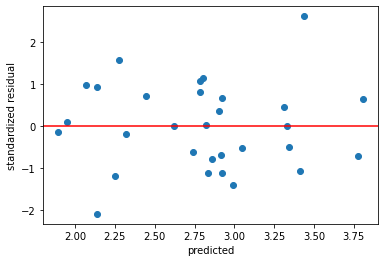

In [ ]:
plt.plot(yhat,rstd,marker='o',linewidth=0)
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.xlabel('predicted')
plt.ylabel('standardized residual')
plt.show()

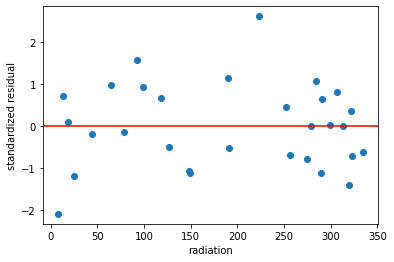

In [ ]:
plt.plot(x[:,1],rstd,marker='o',linewidth=0)
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.xlabel('radiation')
plt.ylabel('standardized residual')
plt.show()

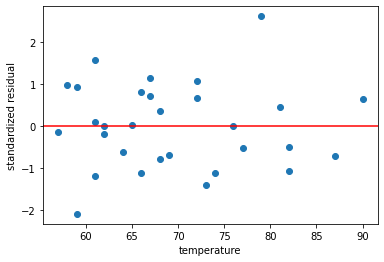

In [ ]:
plt.plot(x[:,2],rstd,marker='o',linewidth=0)
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.xlabel('temperature')
plt.ylabel('standardized residual')
plt.show()

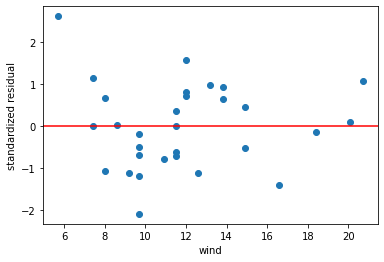

In [ ]:
plt.plot(x[:,3],rstd,marker='o',linewidth=0)
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.xlabel('wind')
plt.ylabel('standardized residual')
plt.show()

P.10

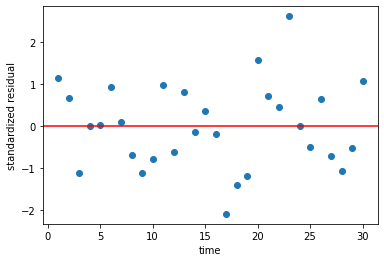

In [ ]:
plt.plot(np.linspace(1, n,n),rstd,marker='o',linewidth=0)
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.xlabel('time')
plt.ylabel('standardized residual')
plt.show()

P.11

In [ ]:
from scipy import stats

0.5499646264096181


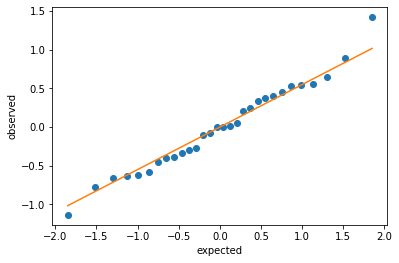

In [ ]:
rsorted=np.sort(res)
exp_q=stats.norm().ppf(np.linspace(1,n,n)/(n+1))
sdr=np.std(res)
print(sdr)
rx0=[min(exp_q),max(exp_q)]
ry0=[min(exp_q)*sdr,max(exp_q)*sdr]
plt.plot(exp_q,rsorted,marker='o',linewidth=0)
plt.plot(rx0, ry0, linestyle = '-')
plt.xlabel('expected')
plt.ylabel('observed')
plt.show()

In [ ]:
stats.shapiro(rstd)

ShapiroResult(statistic=0.9830412268638611, pvalue=0.8993414044380188)

In [ ]:
ydot=y.prod()**(1/n)

In [ ]:
l=1
y1=(y**l-1)/l/ydot**(l-1)
beta1=np.linalg.inv(x.T @ x) @ x.T @ y1
rmse=np.sqrt(sum((y1-x @ beta1)**2)/(n-p-1))
rmse

0.5907567737512012

In [ ]:
y1=ydot*np.log(y)
beta1=np.linalg.inv(x.T @ x) @ x.T @ y1
rmse=np.sqrt(sum((y1-x @ beta1)**2)/(n-p-1))
rmse

0.6431762922964919

In [ ]:
ydot

2.6851004933755442

In [ ]:
ll=[]
lr=np.linspace(-2,2,100)
for l in lr:
  y1=(y**l-1)/l
  beta1=np.linalg.inv(x.T @ x) @ x.T @ y1
  sse=((y1-x @ beta1)**2).sum()
  ll.append(-n/2*np.log(sse)+(l)*(np.log(y)).sum())

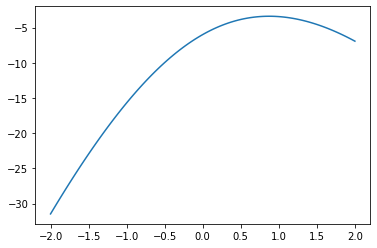

In [ ]:
plt.plot(lr,ll)
plt.show()

P.18

[[ 1.          0.09090118  0.        ]
 [ 2.          0.09659743  0.        ]
 [ 3.          0.0594957   0.        ]
 [ 4.          0.14703059  0.        ]
 [ 5.          0.13191963  0.        ]
 [ 6.          0.08981403  0.        ]
 [ 7.          0.27676972  1.        ]
 [ 8.          0.06080043  0.        ]
 [ 9.          0.10569181  0.        ]
 [10.          0.06461767  0.        ]
 [11.          0.1050444   0.        ]
 [12.          0.14690756  0.        ]
 [13.          0.09932409  0.        ]
 [14.          0.19776627  0.        ]
 [15.          0.09929775  0.        ]
 [16.          0.1121656   0.        ]
 [17.          0.15293555  0.        ]
 [18.          0.14355429  0.        ]
 [19.          0.1300492   0.        ]
 [20.          0.07392162  0.        ]
 [21.          0.12651812  0.        ]
 [22.          0.12594582  0.        ]
 [23.          0.15522111  0.        ]
 [24.          0.10391159  0.        ]
 [25.          0.16358819  0.        ]
 [26.          0.23889095

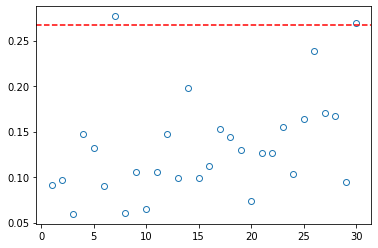

In [ ]:
hii=np.diagonal(H)
cutoff=2*(p+1)/n
obs=list(range(1,n+1))
print(np.c_[obs,hii,hii>cutoff])

plt.plot(obs,hii,linewidth=0,mfc='none',marker='o')
plt.axhline(y = cutoff, color = 'r', linestyle = '--')
plt.show()

In [ ]:
msei=((n-p-1)*mse-res**2/(1-hii))/(n-p-2)
#beta_diff=ixtx @ x*res/(1-hii)
rstudent=res/np.sqrt(msei*(1-hii))

In [ ]:
msei[0]

0.3444991831673748

[[ 1.00000000e+00  1.15723787e+00  0.00000000e+00]
 [ 2.00000000e+00  6.70112844e-01  0.00000000e+00]
 [ 3.00000000e+00 -1.11032765e+00  0.00000000e+00]
 [ 4.00000000e+00 -1.44726708e-03  0.00000000e+00]
 [ 5.00000000e+00  3.54762360e-02  0.00000000e+00]
 [ 6.00000000e+00  9.37286411e-01  0.00000000e+00]
 [ 7.00000000e+00  9.40241178e-02  0.00000000e+00]
 [ 8.00000000e+00 -6.84107872e-01  0.00000000e+00]
 [ 9.00000000e+00 -1.10974464e+00  0.00000000e+00]
 [ 1.00000000e+01 -7.82082691e-01  0.00000000e+00]
 [ 1.10000000e+01  9.88703675e-01  0.00000000e+00]
 [ 1.20000000e+01 -5.96235036e-01  0.00000000e+00]
 [ 1.30000000e+01  8.12486289e-01  0.00000000e+00]
 [ 1.40000000e+01 -1.36798832e-01  0.00000000e+00]
 [ 1.50000000e+01  3.57364581e-01  0.00000000e+00]
 [ 1.60000000e+01 -1.75668323e-01  0.00000000e+00]
 [ 1.70000000e+01 -2.24558694e+00  1.00000000e+00]
 [ 1.80000000e+01 -1.43617958e+00  0.00000000e+00]
 [ 1.90000000e+01 -1.20689556e+00  0.00000000e+00]
 [ 2.00000000e+01  1.62766106e+

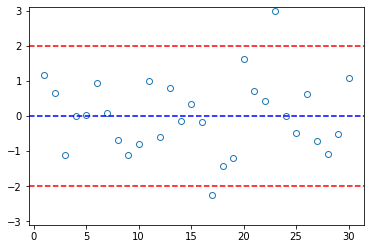

In [ ]:
print(np.c_[obs,rstudent,np.abs(rstudent)>2.])

plt.plot(obs,rstudent,linewidth=0,mfc='none',marker='o')
plt.axhline(y = -2, color = 'r', linestyle = '--')
plt.axhline(y = 0, color = 'b', linestyle = '--')
plt.axhline(y = 2, color = 'r', linestyle = '--')
plt.ylim([-3.1, 3.1])
plt.show()

In [ ]:
Di=res**2/(p+1)/mse*hii/(1-hii)**2
Di[0]

0.033045664713622386

[[1.00000000e+00 3.30456647e-02 0.00000000e+00]
 [2.00000000e+00 1.22637110e-02 0.00000000e+00]
 [3.00000000e+00 1.93239255e-02 0.00000000e+00]
 [4.00000000e+00 9.38739132e-08 0.00000000e+00]
 [5.00000000e+00 4.97251430e-05 0.00000000e+00]
 [6.00000000e+00 2.17737313e-02 0.00000000e+00]
 [7.00000000e+00 8.79306527e-04 0.00000000e+00]
 [8.00000000e+00 7.73243742e-03 0.00000000e+00]
 [9.00000000e+00 3.60653299e-02 0.00000000e+00]
 [1.00000000e+01 1.07236650e-02 0.00000000e+00]
 [1.10000000e+01 2.87090718e-02 0.00000000e+00]
 [1.20000000e+01 1.56936615e-02 0.00000000e+00]
 [1.30000000e+01 1.84404955e-02 0.00000000e+00]
 [1.40000000e+01 1.19857290e-03 0.00000000e+00]
 [1.50000000e+01 3.64201399e-03 0.00000000e+00]
 [1.60000000e+01 1.01240016e-03 0.00000000e+00]
 [1.70000000e+01 1.96982075e-01 1.00000000e+00]
 [1.80000000e+01 8.30381128e-02 0.00000000e+00]
 [1.90000000e+01 5.34972859e-02 0.00000000e+00]
 [2.00000000e+01 4.97142872e-02 0.00000000e+00]
 [2.10000000e+01 1.87060474e-02 0.000000

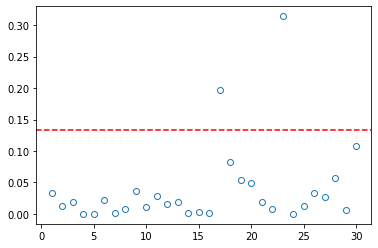

In [ ]:
cutoff=4/n
print(np.c_[obs,Di,Di>cutoff])

plt.plot(obs,Di,linewidth=0,mfc='none',marker='o')
plt.axhline(y = cutoff, color = 'r', linestyle = '--')
plt.show()

In [ ]:
diff=ixtx @ x[[16,22],:].T * res[[16,22]]/(1-hii[[16,22]])
beta1=np.reshape(beta,(-1,1))-diff
print(diff)
print(beta1)

[[-5.07326352e-01 -5.42928943e-02]
 [ 5.65969071e-04 -1.09564879e-04]
 [ 3.48895804e-03  6.07432223e-03]
 [ 9.47197047e-03 -2.46044864e-02]]
[[ 0.21205532 -0.24097813]
 [ 0.00073985  0.00141538]
 [ 0.04211679  0.03953142]
 [-0.03731547 -0.00323901]]


P.23

In [ ]:
x1=x[:,[0,2,3]]
y1=x[:,1]
beta1=np.linalg.inv(x1.T @ x1) @ x1.T @ y1
sse1=sum((y1-x1 @ beta1)**2)
sst1=sum((y1-y1.mean())**2)
rsq1=1-sse1/sst1
tol=1-rsq1
vif=1/tol
print(rsq1,tol,vif)

0.18587461968156704 0.814125380318433 1.2283120317522407


In [ ]:
sxx=np.sum((x.T-np.reshape(np.mean(x,0),(-1,1)))**2,1)
tol=mse/np.diagonal(varBeta)/sxx
vif=1/tol

print(np.c_[tol,vif])

[[       inf 0.        ]
 [0.81412538 1.22831203]
 [0.80204279 1.24681628]
 [0.98181298 1.01852391]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
